In [1]:
# Import libraries
import kmapper as km
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing

In [2]:
import kmapper as km
from kmapper.jupyter import display
import umap
import sklearn.manifold as manifold


C:\Users\pquir\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import warnings

# Apagar warnings
warnings.filterwarnings("ignore")

# Base de datos y análisis exploratorio

https://www.kaggle.com/datasets/insiyeah/musicfeatures?select=data.csv

La base de datos es sobre carácteristicas de diferentes canciones. Ésta consta de 30 columnas las cuales 28 son características numéricas, 1 es el nombre del archivo de audio y la última es el género musical. Está última variable puede tomar 10 valores diferentes (blues, classical, country, disco, etc.).

La base de datos consta de 1000 ejemplos, y en cada uno de los 10 géneros hay 100 ejemplos.

Por último, esta base de datos no tiene valores faltantes en ninguna de las columnas.

In [4]:
# Read data
csv_file = "data.csv"

df = pd.read_csv(csv_file)


In [5]:
df

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [6]:
# Count of songs by genres
category_counts = df['label'].value_counts()
genres = df['label'].values
category_counts

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

La base de datos está equilibrada

In [7]:
# Columns to drop
columns_to_drop = ["mfcc" + str(i) for i in range(1, 21)]

# Drop specified columns
df = df.drop(columns=columns_to_drop)
df = df.drop(columns = "filename")
# Display the updated DataFrame
df

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,blues
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,blues
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,blues
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,blues
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,blues
...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,rock
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,rock
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,rock
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,rock


Este será el dataframe que usaremos.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               1000 non-null   float64
 1   beats               1000 non-null   int64  
 2   chroma_stft         1000 non-null   float64
 3   rmse                1000 non-null   float64
 4   spectral_centroid   1000 non-null   float64
 5   spectral_bandwidth  1000 non-null   float64
 6   rolloff             1000 non-null   float64
 7   zero_crossing_rate  1000 non-null   float64
 8   label               1000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 70.4+ KB


In [9]:
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829


# Visualización de los datos

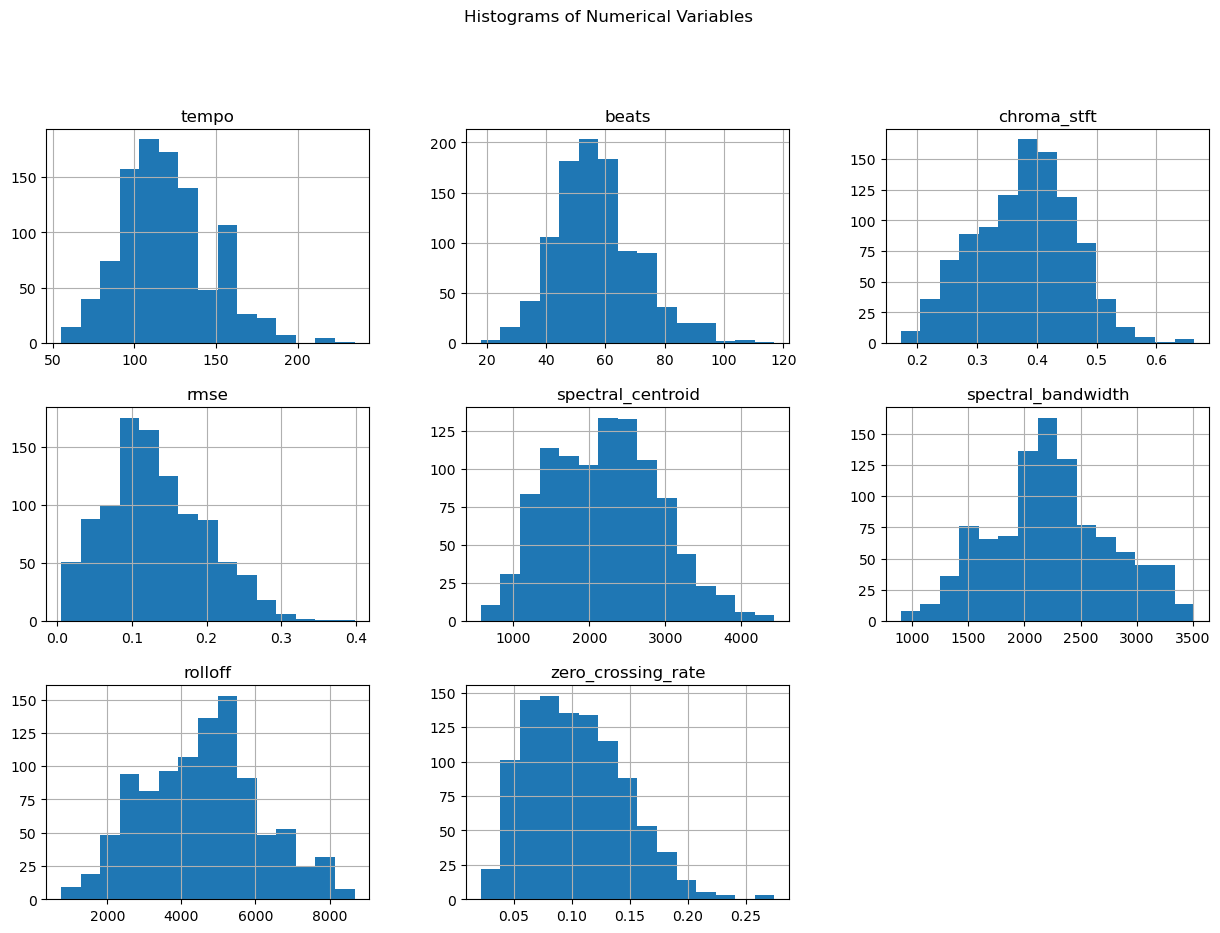

In [10]:
# Plot histograms
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', y=1)
plt.show()

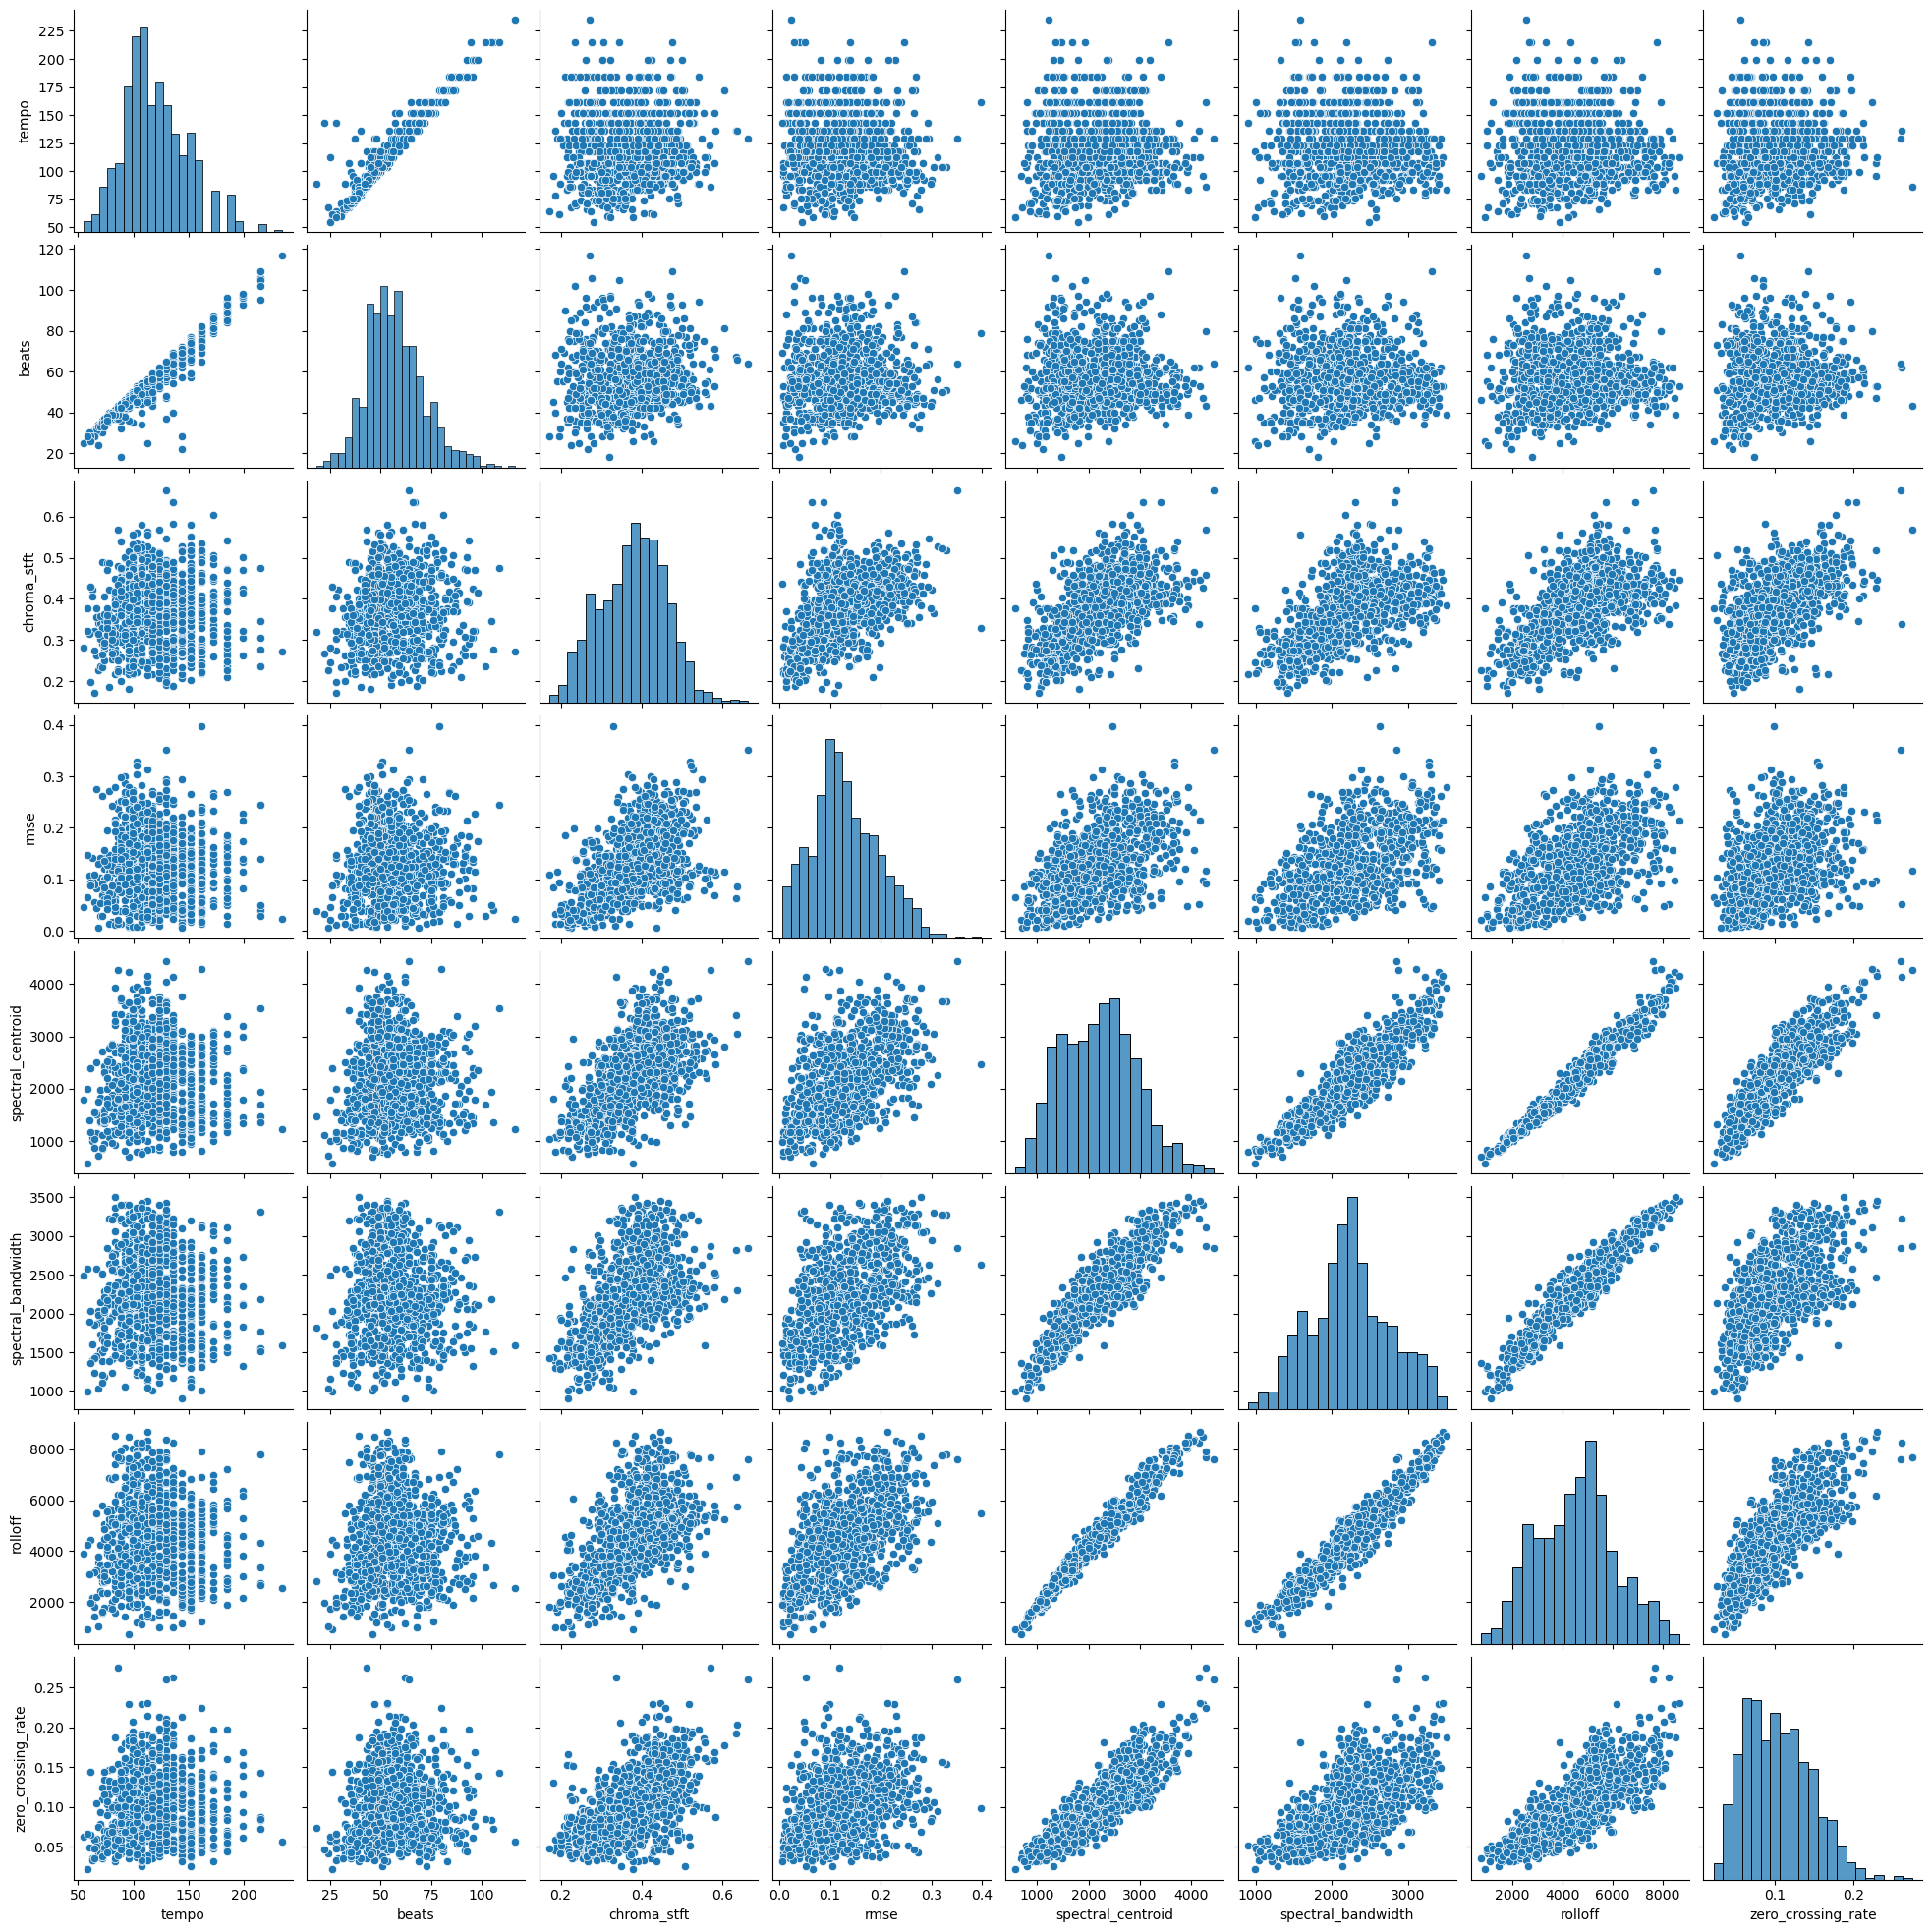

In [11]:
# Create a pair plot
sns.pairplot(df)
plt.show()

Se puede observar que todas las variables tienen una correlación positiva.

También, se puede ver que algunas variables están altamente correlacionadas.

Usemos un correlation plot para analizar esto más a fondo.

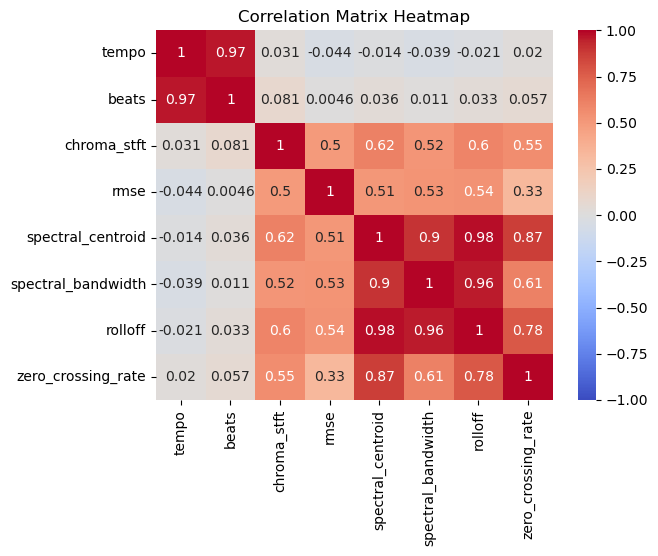

In [12]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Podemos notar que "tempo" y "beats" están altamente relacionadas, sin embargo, no tienen relación con las demás variables.

"chroma_stft" y "rmse" tienen una relación moderada con las otras variables.

"spectral_centroid", "spectral_bandwidth", y "rolloff" tienen una muy alta relación entre sí.

"zero_crossing_rate" tiene una relación muy baja con las primeras 2 variables mencionadas, tiene una relación moderada con las siguientes 2 variables mencionadas, y finalmente, tiene una alta relación con las últimas 3 variables mencionadas.


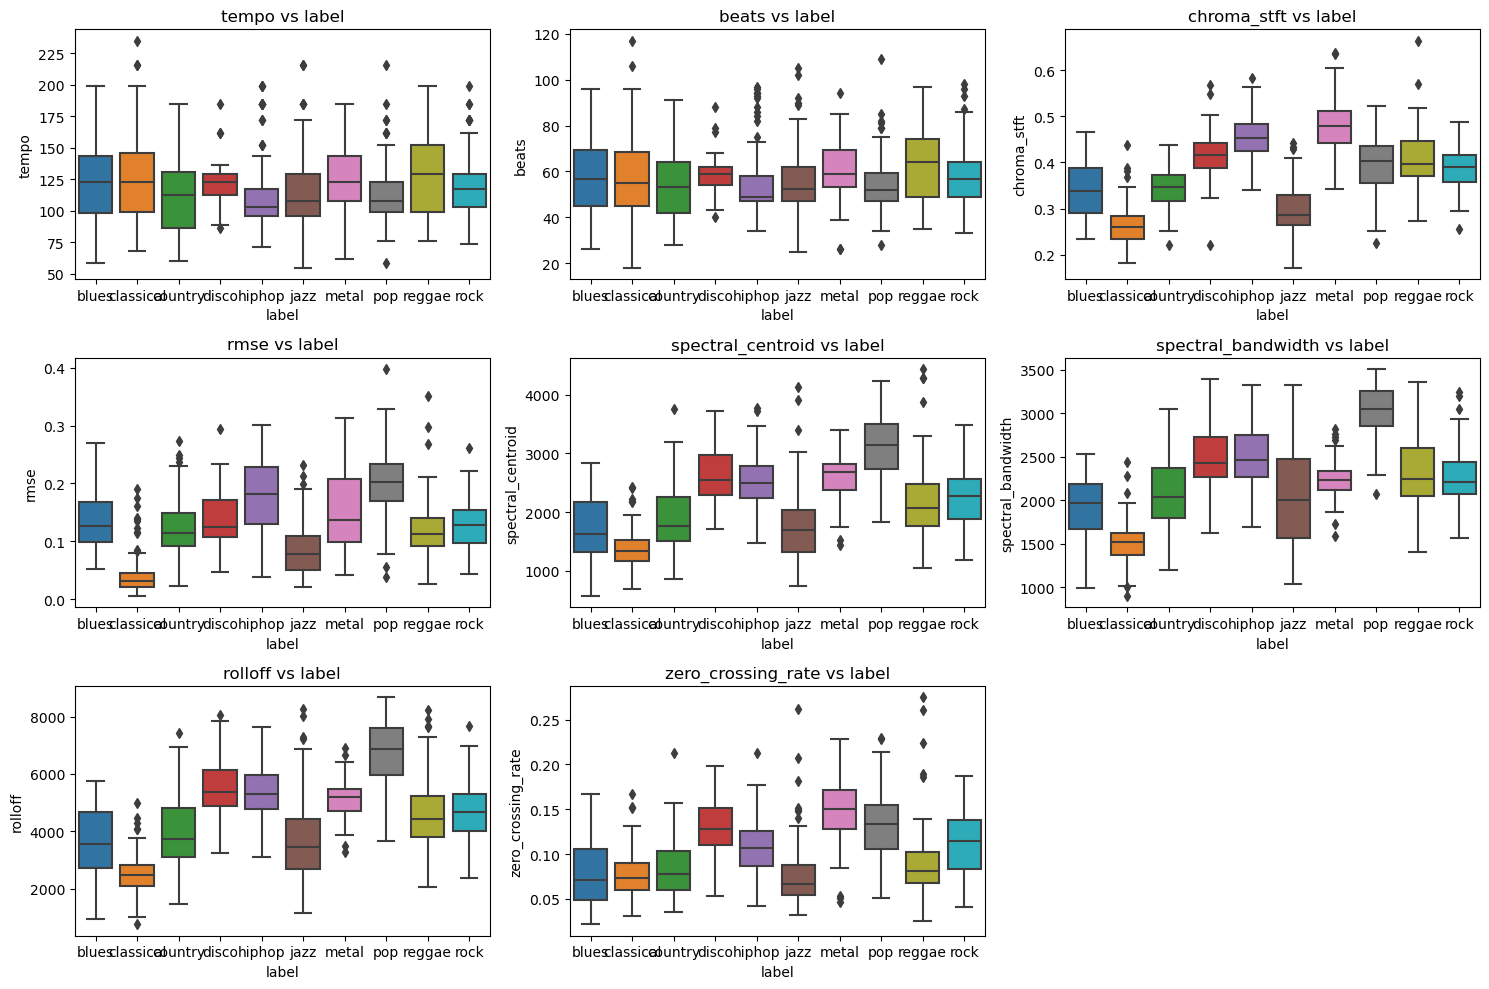

In [13]:
# Box plots for each numerical variable by 'label'
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'{col} vs label')
plt.tight_layout()
plt.show()


A simple vista, es difícil ver la diferencia que tienen las variables variables numéricas de acuerdo al género de las canciones.

# MAPPER ALGORITHM


In [14]:
# Initialize mapper
mapper = km.KeplerMapper(verbose = 1)

KeplerMapper(verbose=1)


In [15]:
# Pop the 'label' column
label_column = df.pop('label')

Separamos las etiquetas del dataframe.

# Función filtro

La función filtro que usarémos estará divida en 2 pasos, primero pasaremos de R^8 a R^5. Esto lo haremos usando el modulo manifold de la librería sklearn. Precisamente, la función que usaremos se llama Isomap (Isometric Mapping). Y después, pasaremos de R^5 a R^2 usando la función UMAP (Uniform Manifold Approximation and Projection).

Al hacerlo, en 2 pasos usando 2 técnicas de reducción de dimensionalidad diferentes, el modelo se vuelve más robusto, es decir, menos vulnerable a variabilidades.

Esta función es una técnica de reducción de dimensionalidad que intenta preservar las distancias geodésicas entre los datos en espacios de alta dimensión cuando los mapea a espacios de dimensión menor.

Isomap se enfoca en preservar la estructura global de los datos. Al considerar las distancias geodésicas, se enfoca en mantener la verdadera relación que existe entre los pares de datos, obteniendo de esta forma, una representación más acertada de la estrucura general.

De igual forma, UMAP busca preservar tanto las estructuras locales como globales en los datos. Esto significa que intenta mantener las relaciones entre puntos de datos, proporcionando una representación fiel de la estructura subyacente.

Finalmente, usamos un escalador para evitar valores atípicos.

In [16]:
# Data projection aka Filter function

projected_data = mapper.fit_transform(df, projection=[manifold.Isomap(n_components = 5, n_jobs = -1), 
                                                        umap.UMAP(n_components = 2, random_state = 7)],
                                     scaler = preprocessing.MinMaxScaler())

..Composing projection pipeline of length 2:
	Projections: Isomap(n_components=5, n_jobs=-1)
		UMAP(random_state=7)
	Distance matrices: False
False
	Scalers: MinMaxScaler()
MinMaxScaler()
..Projecting on data shaped (1000, 8)

..Projecting data using: 
	Isomap(n_components=5, n_jobs=-1)


..Scaling with: MinMaxScaler()

..Projecting on data shaped (1000, 5)

..Projecting data using: 
	UMAP(random_state=7, verbose=1)

UMAP(random_state=7, verbose=1)
Thu Nov  9 20:45:16 2023 Construct fuzzy simplicial set
Thu Nov  9 20:45:17 2023 Finding Nearest Neighbors
Thu Nov  9 20:45:21 2023 Finished Nearest Neighbor Search
Thu Nov  9 20:45:24 2023 Construct embedding


Epochs completed:  21%| ████████████████▎                                                               103/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs


Epochs completed:  55%| ███████████████████████████████████████████▎                                    274/500 [00:01]

	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs


Epochs completed:  88%| █████████████████████████████████████████████████████████████████████▋          441/500 [00:01]

	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs


Epochs completed: 100%| ███████████████████████████████████████████████████████████████████████████████ 500/500 [00:01]

	completed  450  /  500 epochs
Thu Nov  9 20:45:26 2023 Finished embedding

..Scaling with: MinMaxScaler()



# Crear el grafo (cubierta y clustering)

El método de clustering que se usará es el DBSCAN de sklearn. Esto debido a que este método funciona bien cuando no se tiene una previsualizción de los clusters o no se sabe el número de clusters que podemos esperar.

Los intervalos serán 10 y el porcentaje de intersección será de 0.2

In [17]:
# Graph
num_intervals = 10

overlap = 0.2 

cover = km.Cover(n_cubes=num_intervals, perc_overlap = overlap)

G = mapper.map(projected_data, df, clusterer = sklearn.cluster.DBSCAN(metric = "cosine"), cover = cover)

Mapping on data shaped (1000, 8) using lens shaped (1000, 2)

Creating 100 hypercubes.

Created 64 edges and 37 nodes in 0:00:00.045511.


# Visualización

Para la visualización, usaremos un color diferente para cada uno de los géneros músicales.

De esta forma, podremos darnos una idea de las estructuras que tienen las canciones de acuerdo a sus características y podremos ver como estas características definen el género que se le otorga a cada canciones.

También podremos comparar la similitud entre géneros.

En general, esto debería servir para crear un mapa de los géneros musicales.

In [18]:
# output file title
title = "AlgoMapper2"

# Create a dictionary for color codes
dict_genres = {
    'blues': 1,
    'classical': 2,
    'country': 3,
    'disco': 4,
    'hiphop': 5,
    'jazz': 6,
    'metal': 7,
    'pop': 8,
    'reggae': 9,
    'rock': 10
}

# initialize array for saving results
res_genres = []  

# start an example for every genres
res_genres.append([dict_genres[g] for g in genres])


# Color by genres
for genre in list(dict_genres.keys()):
    res_genres.append(np.where(genres == genre, 1, 0))
    
# transpose
res_genres = np.array(res_genres).T

color_values = res_genres

# name of function
name_color_values = ['All'] + list(dict_genres.keys()) 

# Select how to choose the color for each node, given many color values
pooling_colors = ['mean', 'min',  'max']


In [19]:
mapper.visualize(G, title=title, color_values= color_values,
                color_function_name = name_color_values, 
                 node_color_function = pooling_colors,
                custom_tooltips = np.array(df));


Wrote visualization to: mapper_visualization_output.html


In [20]:
from PIL import Image
from IPython.display import display

In [21]:
all_genresi = Image.open('genres.png')
popi = Image.open('pop.png')
jazzi = Image.open('jazz.png')
classicali = Image.open('classical.png')
hiphopi = Image.open('hiphop.png')
discoi = Image.open('disco.png')
bluesi = Image.open("blues.png")

# Análisis de resultados

La imagen tomando todos los géneros se ve así


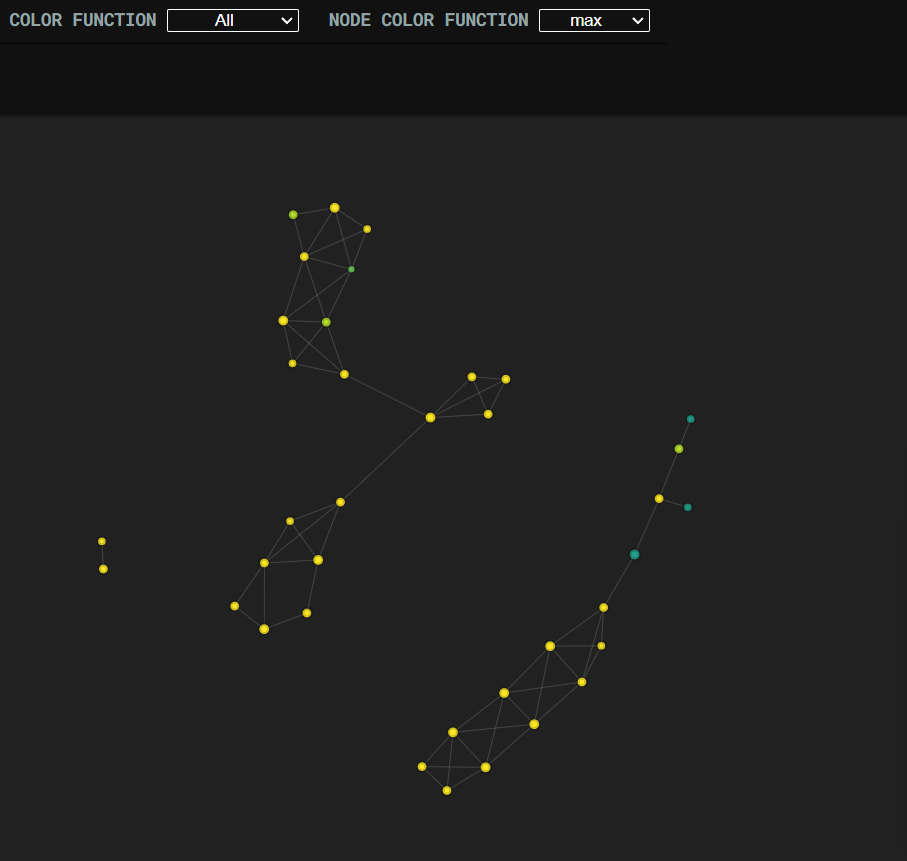

In [22]:
display(all_genresi)

Se muestran 3 componentes conexas, de las cuales 1 parace estar aislada.

Hagámos un análisis por géneros

Si comparamos la música clásica con el pop, podemos ver que son géneros completamente diferentes.

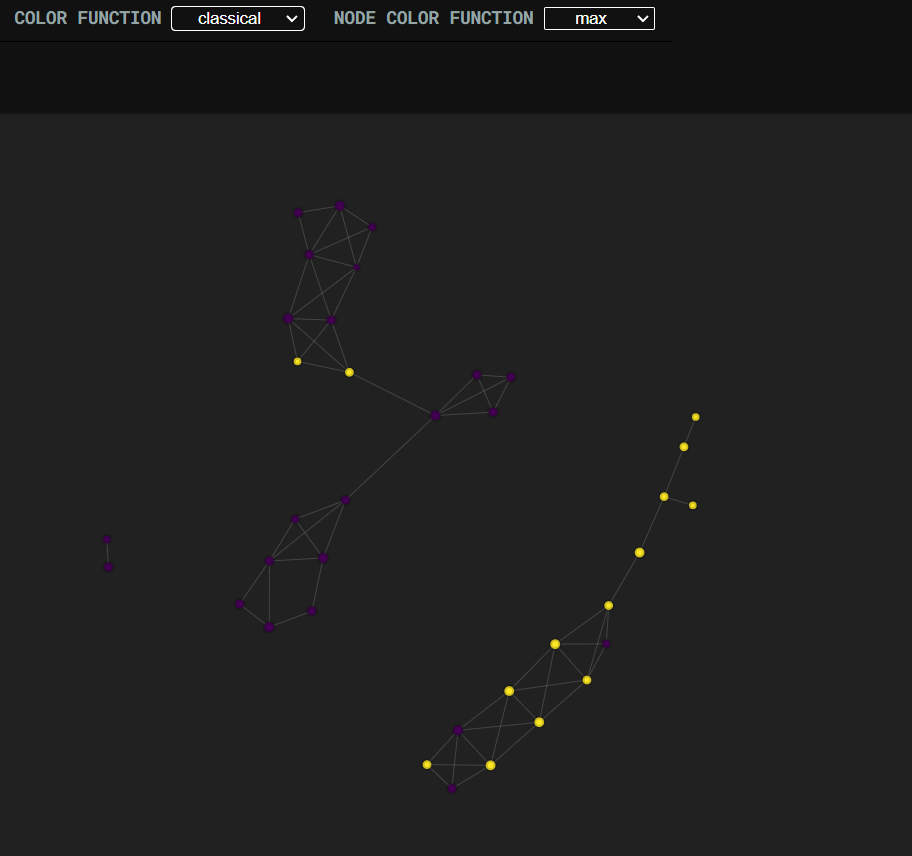

In [23]:
display(classicali)

Podemos ver que "classical" abarca prácticamente toda la componente conexa del centro, toda la componente conexa de la izquierda y unos cuantos nodos de la compoennte conexa de la derecha.

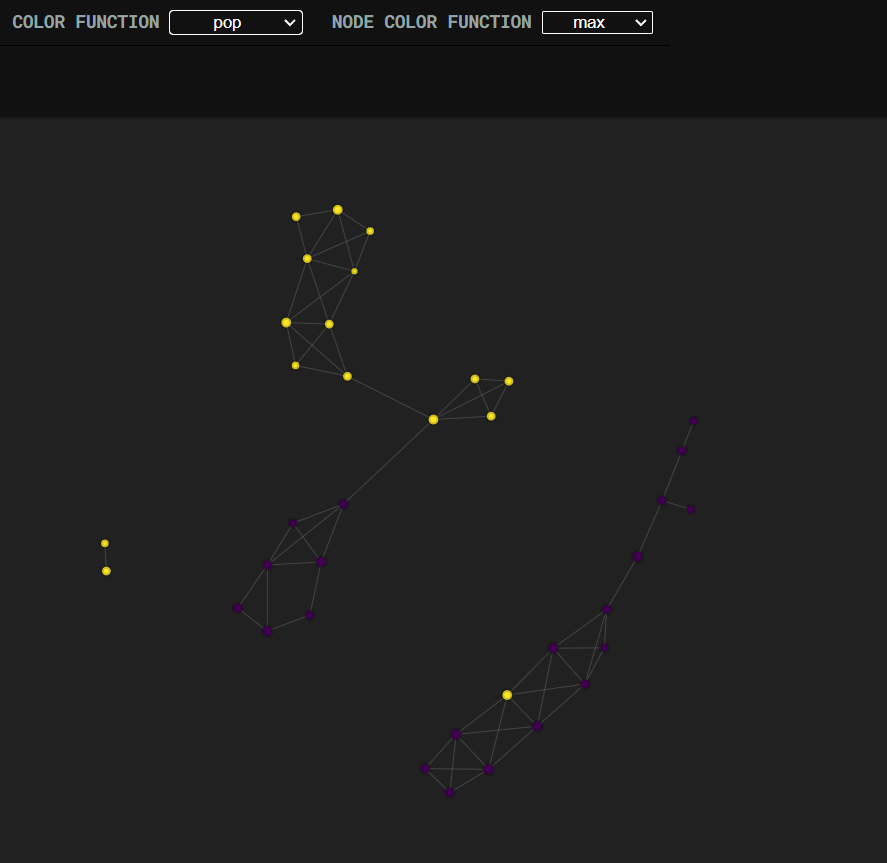

In [24]:
display(popi)

Por el otro lado, "pop" abarca básicamente toda la componente conexa de la derecha y tiene cierta presencia en la componente conexa del centro

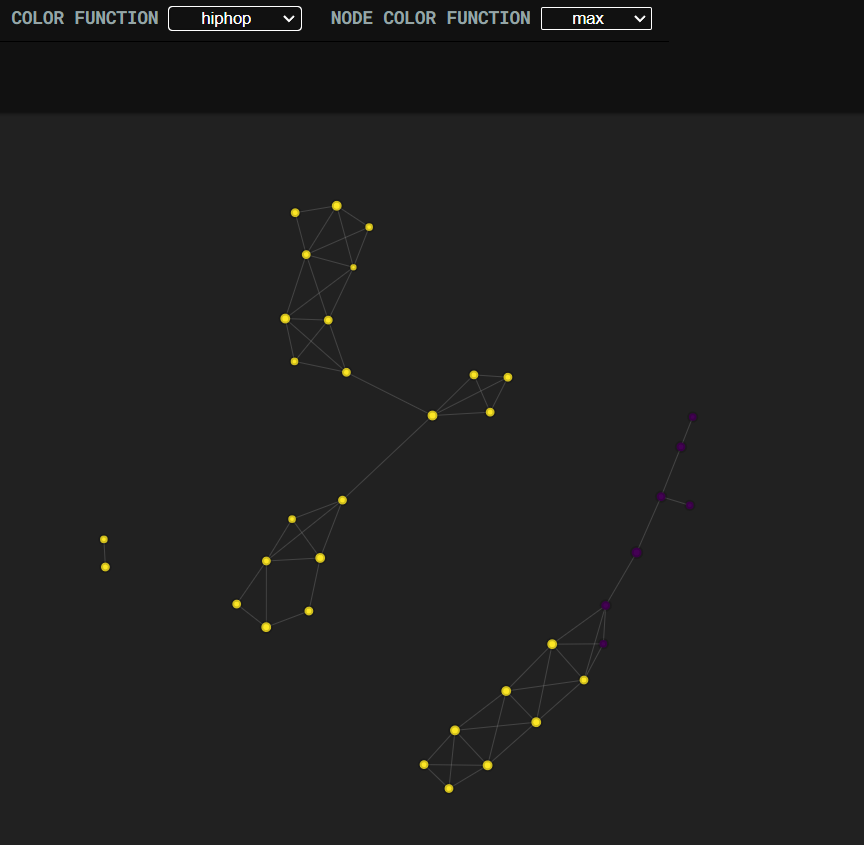

In [25]:
display(hiphopi)

"hiphop" se puede ver como si fuera un subconjunto de "pop", todos los nodos que abarca hiphop también lo hace pop. Pero no al revés.

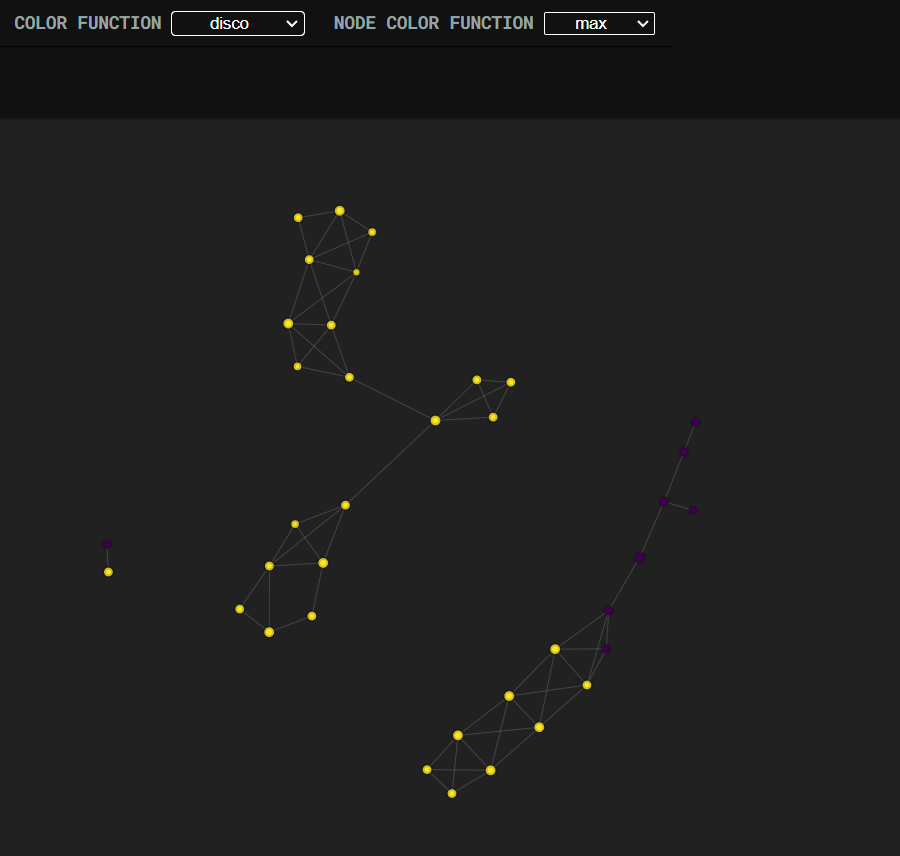

In [26]:
display(discoi)

"disco" muestra prácticamente el mismo grafo que "hiphop". De acuerdo con este algoritmo, hiphop y disco tienen una cercanía muy notoria.

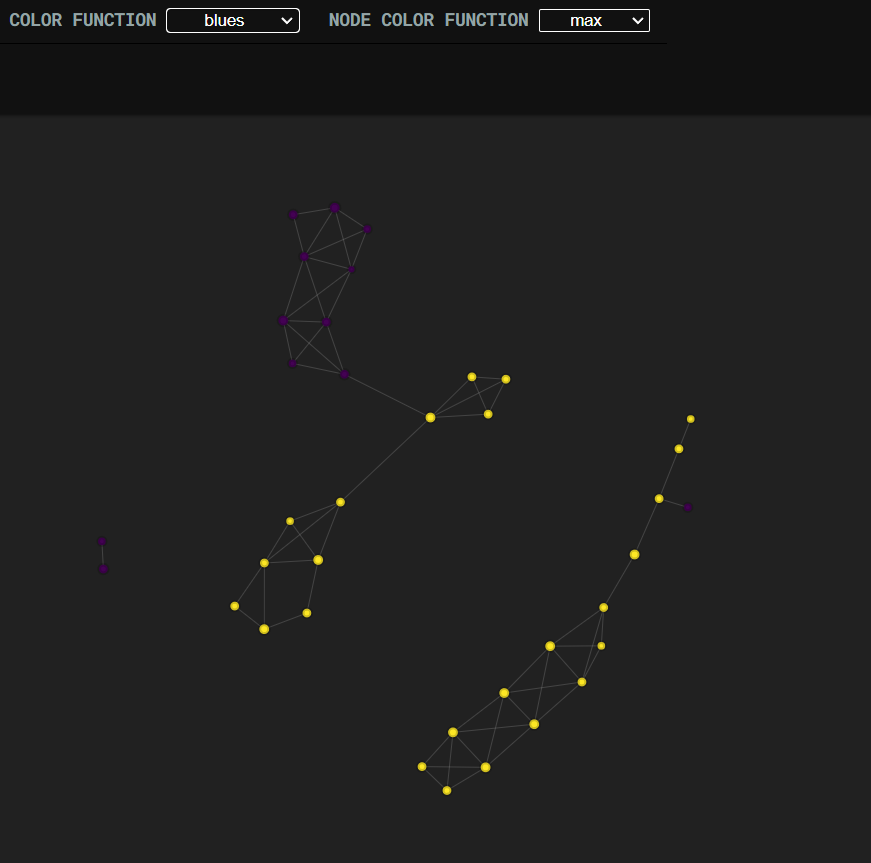

In [27]:
display(bluesi)

El blues parece no tener relación con el pop, el hiphop y el disco. Sin embargo, parece cubrir una parte de lo que cubre classical.

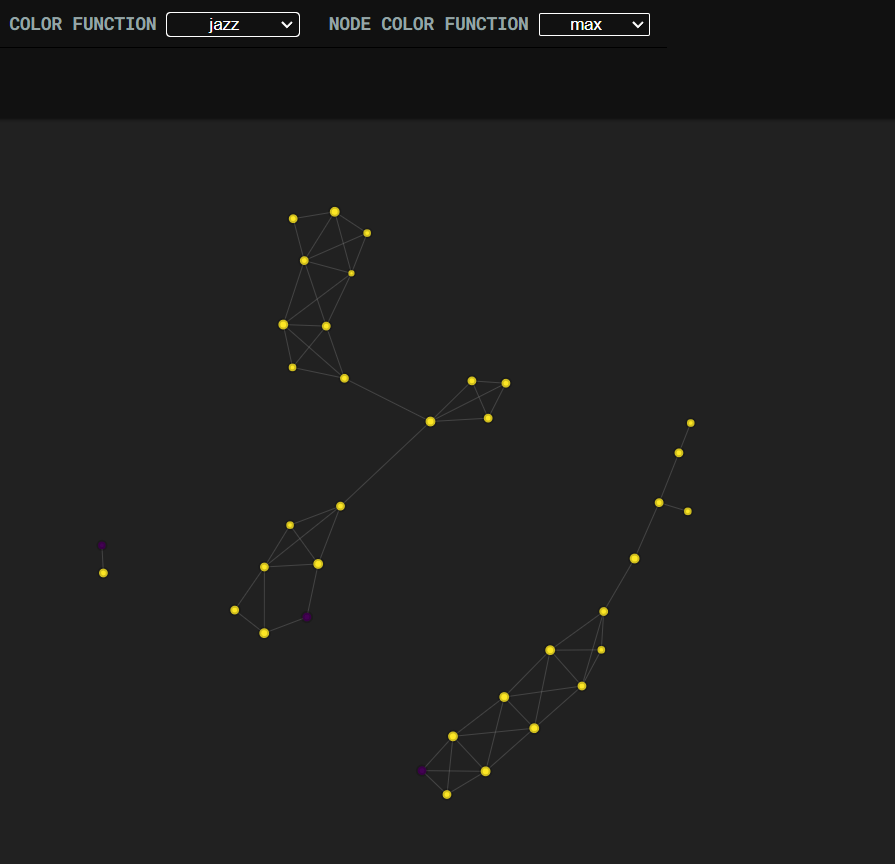

In [28]:
display(jazzi)

"jazz" es el género que, personalmente, más me sorprendió. Abarca solo 1 nodo de cada una de las componentes conexas. Al parecer el jazz es un género muy particular, que no tiene mucha relación o similitud con los otros géneros.

# Conclusión

En resumen, podemos afirmar que la música clásica tiene una alta relación con todos los géneros y es su alcance, en cuanto a características de canciones, es muy amplio. 

El pop, parece ser el segundo género con más alcance. Este tiene mucha cercanía con el hiphop y disco. 

Estos 2 últimos géneros son los más pareceidos entre sí, de hecho no se nota diferencia alguna en el grafo.

Los blues parecen ser una rama de la música clásica, pero no tienen relación alguna con el pop, hiphop y disco.

Por último, el jazz es un género muy singular que no parece estar relacionado con algún otro género.

